# Data Science Salaries 2023
## Salaries of Different Data Science Fields in the Data Science Domain

**Source:** https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

Data Science Job Salaries Dataset contains **11 columns**, each are:

1. **work_year:** The year the salary was paid.
2. **experience_level:** The experience level in the job during the year
3. **employment_type:** The type of employment for the role
4. **job_title:** The role worked in during the year.
5. **salary:** The total gross salary amount paid.
6. **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
7. **salaryinusd:** The salary in USD
8. **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. **remote_ratio:** The overall amount of work done remotely
10. **company_location:** The country of the employer's main office or contracting branch
11. **company_size:** The median number of people that worked for the company during the year


---

In [27]:
# Connect to drive and libraries
from google.colab import drive
drive.mount('/content/drive')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Define function to calculate Gini Coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

# Get dataset 
# (source: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)
csv_file = "/content/drive/MyDrive/DataScience/DataScience Salaries/ds_salaries.csv"
df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: title={'center': 'Inequality (Gini Coefficient) of Salary'}, xlabel='work_year'>

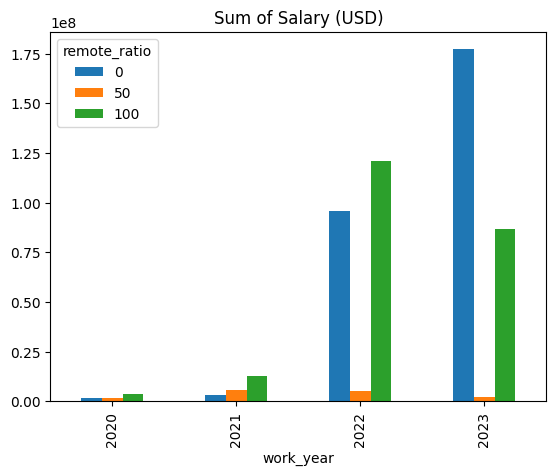

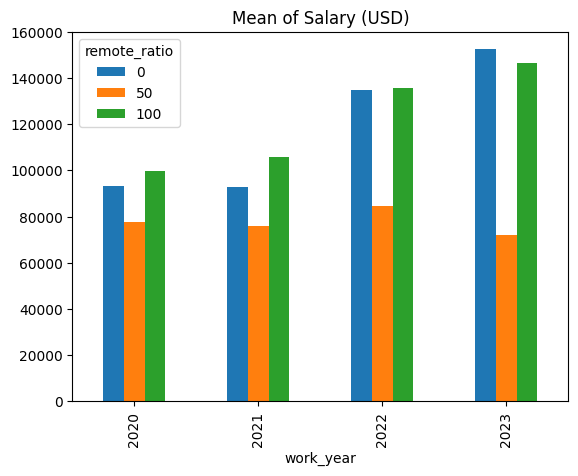

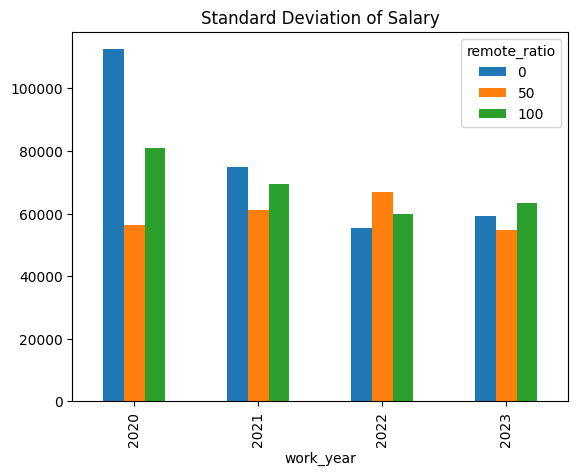

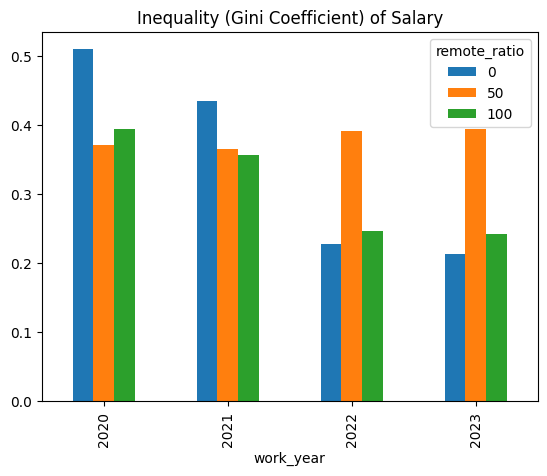

In [28]:
# Temporal Analysis of Salary (USD) and Remote Ratio
salary_gb_year = df.groupby(['work_year', 'remote_ratio'])['salary_in_usd'].agg([np.sum, np.mean, np.std, gini]).reset_index()

salary_gb_year.pivot(index='work_year', columns='remote_ratio', values='sum').plot(kind='bar', title="Sum of Salary (USD)")
salary_gb_year.pivot(index='work_year', columns='remote_ratio', values='mean').plot(kind='bar', title="Mean of Salary (USD)")
salary_gb_year.pivot(index='work_year', columns='remote_ratio', values='std').plot(kind='bar',title="Standard Deviation of Salary")
salary_gb_year.pivot(index='work_year', columns='remote_ratio', values='gini').plot(kind='bar', title="Inequality (Gini Coefficient) of Salary")

<Axes: title={'center': 'Inequality (Gini Coefficient) of Salary'}, xlabel='experience_level'>

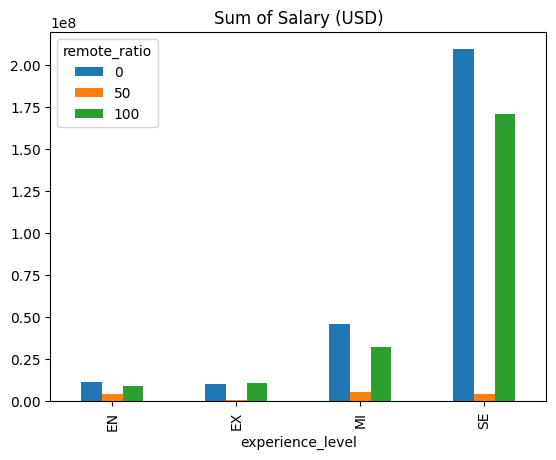

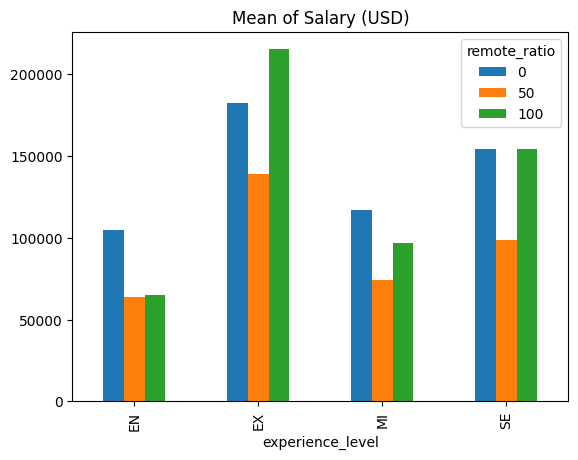

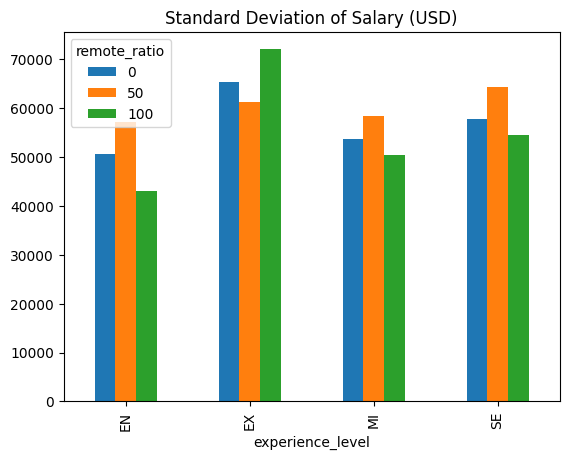

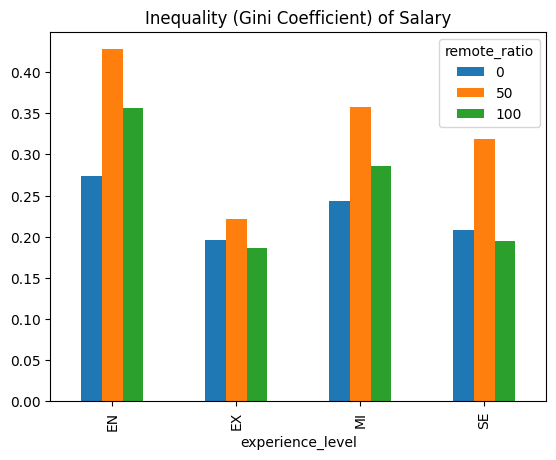

In [29]:
# Analysis of Salary (USD) and Remote Ratio per Experience Level
salary_gb_xp = df.groupby(['experience_level', 'remote_ratio'])['salary_in_usd'].agg([np.sum, np.mean, np.std, gini]).reset_index()

salary_gb_xp.pivot(index = 'experience_level', columns = 'remote_ratio', values = 'sum').plot(kind='bar', title="Sum of Salary (USD)")
salary_gb_xp.pivot(index = 'experience_level', columns = 'remote_ratio', values = 'mean').plot(kind='bar', title = 'Mean of Salary (USD)')
salary_gb_xp.pivot(index = 'experience_level', columns = 'remote_ratio', values = 'std').plot(kind='bar', title="Standard Deviation of Salary (USD)")
salary_gb_xp.pivot(index = 'experience_level', columns = 'remote_ratio', values = 'gini').plot(kind='bar', title="Inequality (Gini Coefficient) of Salary")

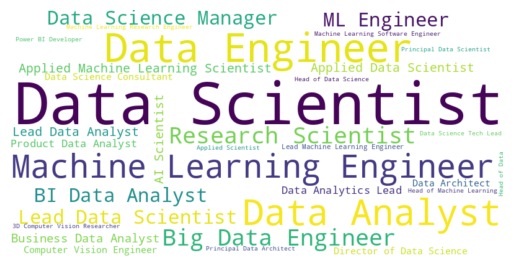

In [32]:
from wordcloud import WordCloud

# Get the job titles with the highest salaries
top_jobs = df.sort_values(by=["salary"], ascending=False).head(100)["job_title"].tolist()

# Concatenate the job titles into a single string
text = " ".join(top_jobs)

# Count the frequency of each job title
word_freq = {}
for job in top_jobs:
    if job in word_freq:
        word_freq[job] += 1
    else:
        word_freq[job] = 1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color="white")
wordcloud.generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()